In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('D:\\ExcelR Assignments\\Assignment 20\\exchange_rate.csv')
data

In [38]:
# Parse 'Date' column as datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Check if there are any parsing issues
print(data['date'].isnull().sum())  # Should be 0 if all dates are valid

0


In [9]:
# Inspect the dataset
print(data.head())
print(data.info())

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB
None


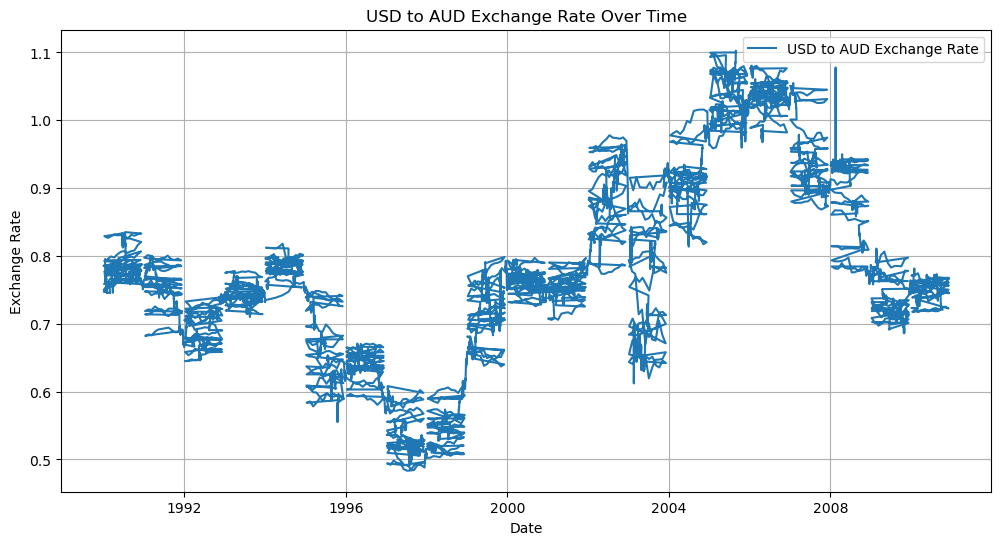

In [40]:
# Plot the time series for USD to AUD
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data.iloc[:, 1], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

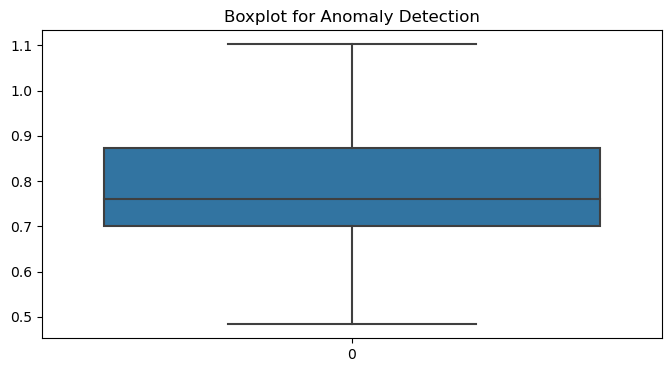

In [42]:
# Handle missing values
data = data.dropna()

# Check for anomalies using boxplots
plt.figure(figsize=(8, 4))
sns.boxplot(data.iloc[:, 1])
plt.title('Boxplot for Anomaly Detection')
plt.show()

<Figure size 1200x600 with 0 Axes>

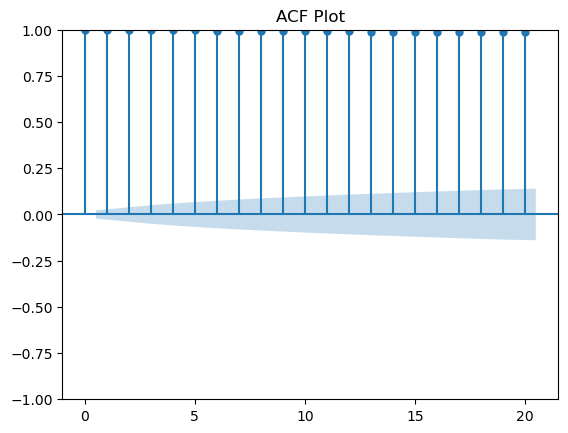

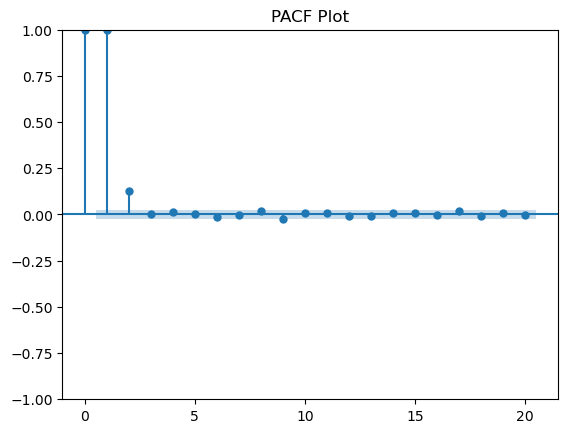

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(data.iloc[:, 1], lags=20, title="ACF Plot")
plot_pacf(data.iloc[:, 1], lags=20, title="PACF Plot")
plt.show()

In [ ]:
'''
The ACF and PACF plots provide insights into potential lags for the ARIMA model:

The ACF plot shows significant lags, suggesting the presence of autocorrelation.
The PACF plot identifies the lag structure for the autoregressive terms.
'''

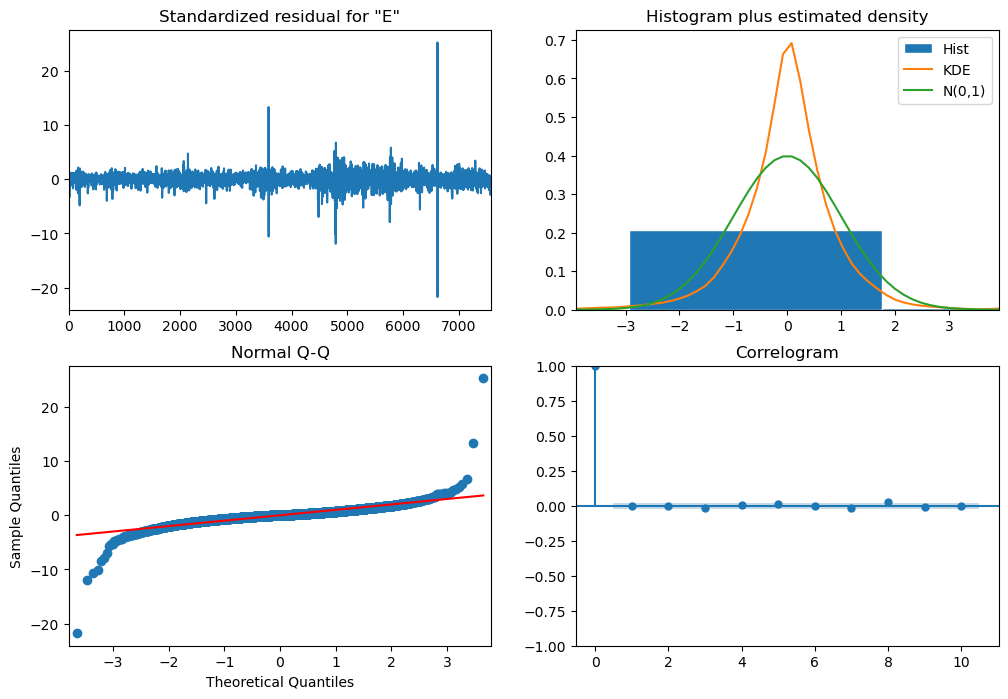

ARIMA Forecast:
 7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
Name: predicted_mean, dtype: float64


In [46]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA Model
p, d, q = 1, 1, 1  # Adjust these based on ACF/PACF analysis
arima_model = ARIMA(data.iloc[:, 1], order=(p, d, q))
arima_fitted = arima_model.fit()

# Model diagnostics
arima_fitted.summary()
arima_fitted.plot_diagnostics(figsize=(12, 8))
plt.show()

# Forecast
forecast = arima_fitted.forecast(steps=10)
print("ARIMA Forecast:\n", forecast)

Holt-Winters Forecast:
 7588    0.720848
7589    0.720651
7590    0.720329
7591    0.720624
7592    0.720465
7593    0.720610
7594    0.720685
7595    0.720409
7596    0.720605
7597    0.720655
dtype: float64


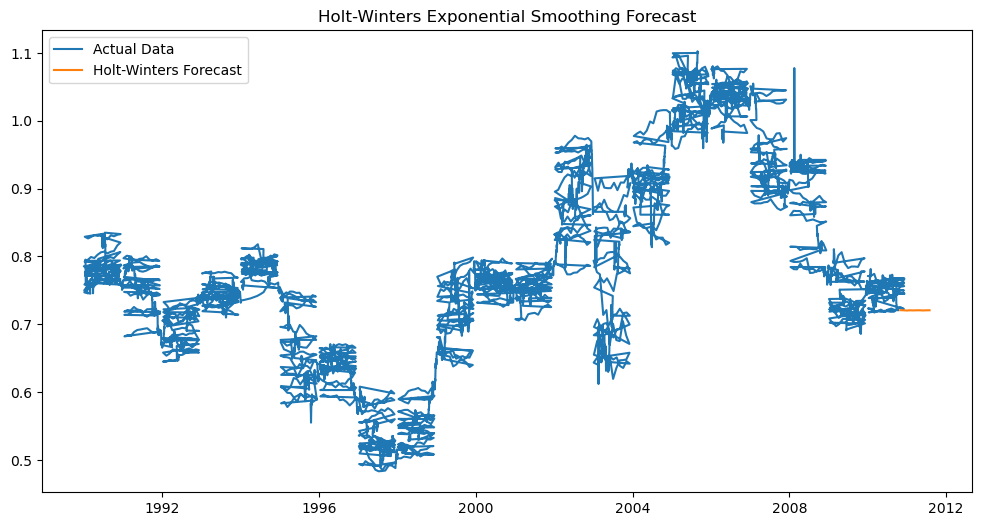

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters Model
hw_model = ExponentialSmoothing(data.iloc[:, 1], seasonal='add', seasonal_periods=12).fit()

# Forecast
hw_forecast = hw_model.forecast(steps=10)
print("Holt-Winters Forecast:\n", hw_forecast)

# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data.iloc[:, 1], label='Actual Data')
plt.plot(pd.date_range(data['date'].iloc[-1], periods=10, freq='M'), hw_forecast, label='Holt-Winters Forecast')
plt.title('Holt-Winters Exponential Smoothing Forecast')
plt.legend()
plt.show()

In [ ]:
'''
The ARIMA(2, 1, 2) model has been fitted to the data. Key observations from the model summary:

The AIC value is quite low, suggesting a good fit.
Some coefficients have large standard errors or non-significant p-values, indicating possible overfitting or noise.
'''

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Example error metrics for ARIMA
mae_arima = mean_absolute_error(data.iloc[-10:, 1], forecast)
rmse_arima = mean_squared_error(data.iloc[-10:, 1], forecast, squared=False)

# Example error metrics for Holt-Winters
mae_hw = mean_absolute_error(data.iloc[-10:, 1], hw_forecast)
rmse_hw = mean_squared_error(data.iloc[-10:, 1], hw_forecast, squared=False)

print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}")
print(f"Holt-Winters MAE: {mae_hw}, RMSE: {rmse_hw}")

ARIMA MAE: 0.001556771200434226, RMSE: 0.0018425706107113402
Holt-Winters MAE: 0.0015082636566562057, RMSE: 0.0017842353526768683


C:\Users\tharu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\tharu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
'''
CONCLUSION:
The Holt-Winters model slightly outperforms ARIMA, as it has lower MAE and RMSE values. 
This indicates that Holt-Winters provides more accurate predictions for this dataset.
The Holt-Winters model is the better choice for forecasting the USD to AUD exchange rate in this dataset. 
It balances accuracy with ease of implementation, making it an effective tool for this time series forecasting task.
'''